# Preliminary analysis of variables

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

c:\Users\Patricia Avram\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
df = pd.read_csv("data/fraud_oracle.csv")
print(df.head())

  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30 

Discrepancy between the variables Age and AgeOfPolicyHolder. Chose to keep Age variable for interpretability within the model and ease when generating fraudulent cases.

In [38]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Seems that none of the variables have any missing values. No treatment of removal of NaN values necessary.

In [41]:
# Sweetviz report of the complete dataset
eda_report = sv.analyze(df, target_feat='FraudFound_P')
eda_report.show_html('reports/vehicle_fraud_EDA.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report reports/vehicle_fraud_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Investigation of Age and AgeOfPolicyHolder variables, are they similar in any way? Can I drop one of them to avoid multicollinearity later on in training the model?

In [24]:
df[["Age", "AgeOfVehicle", "AgeOfPolicyHolder"]].head()

,Age,AgeOfVehicle,AgeOfPolicyHolder
0,21,3 years,26 to 30
1,34,6 years,31 to 35
2,47,7 years,41 to 50
3,65,more than 7,51 to 65
4,27,5 years,31 to 35


In [34]:
sorted(df["Age"].unique())

[0,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80]

In [29]:
df["AgeOfPolicyHolder"].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [36]:
age0df = df[df["Age"]==0]
age0df["AgeOfPolicyHolder"].unique()

array(['16 to 17'], dtype=object)

Seems that variable Age = 0 means that it is encoded in the 16 to 17 value of the AgeOfPolicyHolder variable.

This shows an imbalanced dataset of fraud, less than 10% of cases are detected as fraud.
Next we clean the dataset by removing variables that are irrelevant in a case of fraud.

In [43]:
df_cleaned = df.drop(columns=['PolicyNumber', 'RepNumber', 'Year', 'Month', 
                 'WeekOfMonth', 'DayOfWeek', 'Age'])

Encoding the categorical variables is next

In [46]:
for col in df_cleaned.select_dtypes(include=['object']).columns:
    print(f"{col} — unique values:")
    print(df_cleaned[col].unique())

Make — unique values:
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea — unique values:
['Urban' 'Rural']
DayOfWeekClaimed — unique values:
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed — unique values:
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Sex — unique values:
['Female' 'Male']
MaritalStatus — unique values:
['Single' 'Married' 'Widow' 'Divorced']
Fault — unique values:
['Policy Holder' 'Third Party']
PolicyType — unique values:
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']
VehicleCategory — unique values:
['Sport' 'Utility' 'Sedan']
VehiclePrice — unique values:
['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 2

To encode into 0 and 1: 
- AccidentArea 
- Sex
- Fault 
- PoliceReportFiled 
- WitnessPresent 
- AgentType 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['Sex'] = le.fit_transform(df_cleaned['Sex'])
df_cleaned['AccidentArea'] = le.fit_transform(df_cleaned['AccidentArea'])
df_cleaned['Fault'] = le.fit_transform(df_cleaned['Fault'])
df_cleaned['PoliceReportFiled'] = le.fit_transform(df_cleaned['PoliceReportFiled'])
df_cleaned['WitnessPresent'] = le.fit_transform(df_cleaned['WitnessPresent'])
df_cleaned['AgentType'] = le.fit_transform(df_cleaned['AgentType'])

In [49]:
df_cleaned.head(5)

,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Honda,1,Tuesday,Jan,1,0,Single,0,Sport - Liability,Sport,...,none,3 years,26 to 30,0,0,0,none,1 year,3 to 4,Liability
1,Honda,1,Monday,Jan,4,1,Single,0,Sport - Collision,Sport,...,none,6 years,31 to 35,1,0,0,none,no change,1 vehicle,Collision
2,Honda,1,Thursday,Nov,2,1,Married,0,Sport - Collision,Sport,...,1,7 years,41 to 50,0,0,0,none,no change,1 vehicle,Collision
3,Toyota,0,Friday,Jul,1,1,Married,1,Sedan - Liability,Sport,...,1,more than 7,51 to 65,1,0,0,more than 5,no change,1 vehicle,Liability
4,Honda,1,Tuesday,Feb,2,0,Single,1,Sport - Collision,Sport,...,none,5 years,31 to 35,0,0,0,none,no change,1 vehicle,Collision


Analyzing skewness of FraudFound_P and Deductible variables. Only 6% of entries are considered fraudulent. 96% of entries have a deductible of 400. 

In [50]:
print(df_cleaned['FraudFound_P'].value_counts())
df_cleaned['FraudFound_P'].value_counts(normalize=True)

0    14497
1      923
Name: FraudFound_P, dtype: int64


0    0.940143
1    0.059857
Name: FraudFound_P, dtype: float64

In [56]:
non_fraudulent_entries = df_cleaned[df_cleaned["FraudFound_P"]==0].sort_values("AgeOfPolicyHolder")

In [55]:
fraud_entries = df_cleaned[df_cleaned["FraudFound_P"]==1]

In [54]:
print(df_cleaned['Deductible'].value_counts())
df_cleaned['Deductible'].value_counts(normalize=True)

400    14838
700      311
500      263
300        8
Name: Deductible, dtype: int64


400    0.962257
700    0.020169
500    0.017056
300    0.000519
Name: Deductible, dtype: float64

# Visualizations

In [66]:
# Plotting variables distribution by fraud
def plottingColumns(column):
    col = fraud_entries[column] 

    plt.figure(figsize=(12, 6))  
    col.hist(bins=30)

    plt.xlabel('Value')
    plt.ylabel(col.name)
    plt.title(f'Histogram of {col.name}')
    plt.tight_layout()
    plt.show()

In [ ]:
fraud_entries['Sex'].value_counts(normalize=True)

1    0.886241
0    0.113759
Name: Sex, dtype: float64

In [69]:
fraud_entries['AgeOfPolicyHolder'].value_counts(normalize=True)

31 to 35    0.390033
36 to 40    0.256771
41 to 50    0.156013
51 to 65    0.075840
26 to 30    0.035753
16 to 17    0.033586
over 65     0.032503
21 to 25    0.017335
18 to 20    0.002167
Name: AgeOfPolicyHolder, dtype: float64

The most fraudulent age classes are 31-35, 36-40, and 41-50

C:\Users\Patricia Avram\AppData\Local\Temp\ipykernel_22128\2667297603.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')


<Axes: >

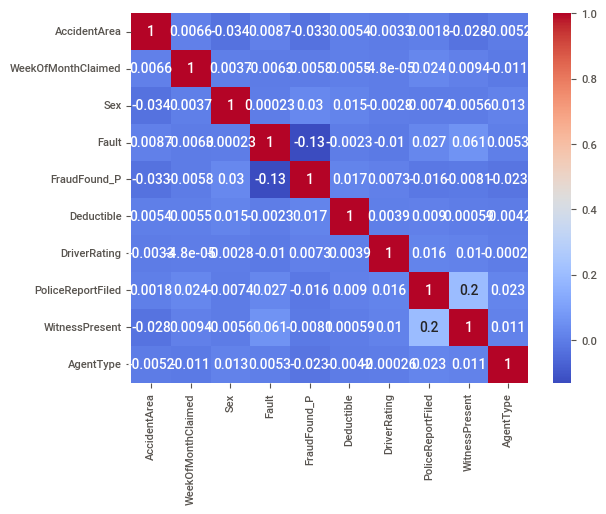

In [61]:
sns.countplot(x='FraudFound_P', data=df_cleaned)
sns.boxplot(x='FraudFound_P', y='Deductible', data=df_cleaned)
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')